<a href="https://colab.research.google.com/github/nanadotam/linalgproj/blob/main/Linear_Algebra_Project_Group_5_NKA_BLA_GOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import sympy as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [47]:
"""
Create Augmented matrix from user input
"""

def create_matrix():
    # Get number of rows and columns from user input
    print("Enter the dimensions of the matrix:")
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns (including the augmented column): "))

    matrix = []  # Create an empty matrix

    # Populate the matrix with user input
    for i in range(rows):
        while True:
            # Prompt user to enter elements of the matrix for the current row
            row = input(f"Enter elements of the matrix at row {i+1} (including element at augmented column), separated by commas: ")
            row = list(map(int, row.split(',')))

            # Check if the row has the correct number of elements
            if len(row) != cols:
                print(f"Error: You must enter exactly {cols} elements.")
            else:
                matrix.append(row)  # Add the row to the matrix
                break  # Exit the loop once a valid row is entered

    # Allow the user to edit the matrix
    while True:
        print("\nCurrent Matrix:")
        # Display the current matrix
        for row in matrix:
            print(" ".join(map(str, row[:-1])) + " | " + str(row[-1]))

        # Ask the user if they want to edit any value
        edit = input("Would you like to edit any value? (yes/no): ").strip().lower()
        if edit == 'yes':
            # Prompt user to enter the row and column number to edit, and the new value
            row_num = int(input("Enter the row number to edit: ")) - 1
            col_num = int(input("Enter the column number to edit: ")) - 1
            new_value = int(input(f"Enter the new value for Row {row_num+1}, Column {col_num+1}: "))
            matrix[row_num][col_num] = new_value  # Update the matrix with the new value
        elif edit == 'no':
            break  # Exit the loop if no edits are needed
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")

    return sp.Matrix(matrix)  # Return the matrix as a SymPy Matrix object

In [48]:
def generate_vectors(rref_matrix, pivot_columns):
    # Check if the system is inconsistent
    if any(all(rref_matrix[i, j] == 0 for j in range(rref_matrix.shape[1] - 1)) and rref_matrix[i, -1] != 0 for i in range(rref_matrix.shape[0])):
        return []

    # Handle single row case
    if rref_matrix.shape[0] == 1:
        return [rref_matrix[:, :-1]]

    # Generate vectors for free columns
    free_columns = [rref_matrix[:, i] for i in range(rref_matrix.shape[1]) if i not in pivot_columns]

    # Convert free columns to vectors (negating)
    for i in range(len(free_columns) - 1):
        free_columns[i] = free_columns[i].applyfunc(lambda x: -x)

    # Setting Up Identity Matrix
    for idx in range(len(free_columns) - 2):
        free_columns[idx][idx + 1, 0] = 1

    return free_columns


In [49]:
def describe_solution(vectors):
    print("\nThe solution spans the following vector(s):\n")
    for vector in vectors:
        print(vector)

In [50]:
# # def plot_solution_set(vectors):
# #     vector_count = len(vectors)
# #     if vector_count == 0:
# #         print("The system has no solutions (it is inconsistent).\n")
# #         return

# #     if vector_count == 2:
# #         if len(vectors[0]) == 3:
# #             print("The solution set forms a line in 3D.\n")
# #             plot_line(vectors)
# #         elif len(vectors[0]) == 2:
# #             print("The solution set forms a line in 2D.\n")
# #             plot_line(vectors)
# #         else:
# #             print("Unsupported vector dimension.")
# #     elif vector_count == 3:
# #         print("The solution set forms a plane.\n")
# #         plot_plane(vectors)

# #     describe_solution(vectors)


# def plot_solution_set(vectors):
#     vector_count = len(vectors)
#     if vector_count == 0:
#         print("The system has no solutions (it is inconsistent).\n")
#         return

#     if vector_count == 2:
#         if len(vectors[0]) == 3:
#             print("The solution set forms a line in 3D.\n")
#             plot_line(vectors)
#         elif len(vectors[0]) == 2:
#             print("The solution set forms a line in 2D.\n")
#             plot_line(vectors)
#         else:
#             print("Unsupported vector dimension.")
#     elif vector_count == 3:
#         print("The solution set forms a plane.\n")
#         plot_plane(vectors)

#     describe_solution(vectors)

def plot_solution_set(vectors):
    vector_count = len(vectors)

    if vector_count == 0:
        print("The system has no solutions (it is inconsistent).\n")
        return

    if vector_count == 1:
        print("The solution set forms a single point.\n")
        plot_point(vectors[0])
    elif vector_count == 2:
        if len(vectors[0]) == 3:
            print("The solution set forms a line in 3D.\n")
            plot_line(vectors)
        elif len(vectors[0]) == 2:
            print("The solution set forms a line in 2D.\n")
            plot_line(vectors)
        else:
            print("Unsupported vector dimension.")
    elif vector_count == 3:
        print("The solution set forms a plane.\n")
        plot_plane(vectors)

    describe_solution(vectors)


In [51]:
def plot_point(vector):
    array = np.array(vector).astype(np.float64).flatten()

    if len(array) == 3:
        fig = go.Figure()

        fig.add_trace(go.Scatter3d(
            x=[array[0]],
            y=[array[1]],
            z=[array[2]],
            mode='markers',
            marker=dict(size=5),
            name='Unique Solution'
        ))

        fig.show()
    elif len(array) == 2:
        fig, ax = plt.subplots()

        ax.plot(array[0], array[1], 'o', label='Unique Solution')

        ax.legend()
        plt.show()
    else:
        print("Unsupported vector dimension for plotting.")


The solution set forms a line in 2D.



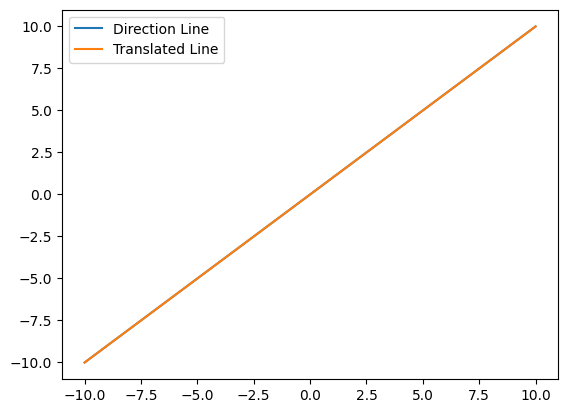


The solution spans the following vector(s):

Matrix([[-1], [-1]])
Matrix([[0], [0]])


In [52]:
# def plot_line(vectors):
#     arrays = [np.array(vector).astype(np.float64).flatten() for vector in vectors]
#     direction_vector = arrays[0]
#     translation_vector = arrays[1]

#     t = np.linspace(-10, 10, 100)
#     line_points = np.outer(t, direction_vector).T  # Transpose to get points in columns

#     fig = go.Figure()

#     fig.add_trace(go.Scatter3d(
#         x=line_points[0],
#         y=line_points[1],
#         z=line_points[2],
#         mode='lines',
#         name='Direction Line'
#     ))

#     # Ensure translation_vector is broadcastable with line_points
#     translated_points = line_points + translation_vector[:, np.newaxis]  # Adding new axis for broadcasting
#     fig.add_trace(go.Scatter3d(
#         x=translated_points[0],
#         y=translated_points[1],
#         z=translated_points[2],
#         mode='lines',
#         name='Translated Line'
#     ))

#     fig.show()


def plot_line(vectors):
    arrays = [np.array(vector).astype(np.float64).flatten() for vector in vectors]
    direction_vector = arrays[0]
    translation_vector = arrays[1]

    t = np.linspace(-10, 10, 100)
    line_points = np.outer(t, direction_vector).T  # Transpose to get points in columns

    if len(direction_vector) == 3:
        fig = go.Figure()

        fig.add_trace(go.Scatter3d(
            x=line_points[0],
            y=line_points[1],
            z=line_points[2],
            mode='lines',
            name='Direction Line'
        ))

        # Ensure translation_vector is broadcastable with line_points
        translated_points = line_points + translation_vector[:, np.newaxis]  # Adding new axis for broadcasting
        fig.add_trace(go.Scatter3d(
            x=translated_points[0],
            y=translated_points[1],
            z=translated_points[2],
            mode='lines',
            name='Translated Line'
        ))

        fig.show()
    elif len(direction_vector) == 2:
        fig, ax = plt.subplots()

        ax.plot(line_points[0], line_points[1], label='Direction Line')

        translated_points = line_points + translation_vector[:, np.newaxis]
        ax.plot(translated_points[0], translated_points[1], label='Translated Line')

        ax.legend()
        plt.show()
    else:
        print("Unsupported vector dimension for plotting.")

def test_underdetermined_infinite_line():
    input_matrix = sp.Matrix([
        [1, 2, 3, 0],
        [0, 1, 1, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_underdetermined_infinite_line()



In [53]:
def plot_plane(vectors):
    arrays = [np.array(vector).astype(np.float64) for vector in vectors]
    x_vector, y_vector, translation_vector = arrays

    x_range = np.linspace(-10, 10, 20)
    y_range = np.linspace(-10, 10, 20)
    X, Y = np.meshgrid(x_range, y_range)
    Z = 2 * X + 3 * Y

    fig = go.Figure()

    fig.add_trace(go.Surface(
        x=X, y=Y, z=Z,
        colorscale='Viridis',
        name='Original Plane'
    ))

    translated_Z = Z + translation_vector[2]
    fig.add_trace(go.Surface(
        x=X, y=Y, z=translated_Z,
        colorscale='Blues',
        name='Translated Plane'
    ))

    fig.update_layout(scene=dict(aspectmode="cube"))
    fig.show()

In [ ]:
def main():
    matrix = create_matrix()
    rref_matrix, pivot_columns = matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

if __name__ == "__main__":
    main()

Enter the dimensions of the matrix:
Enter the number of rows: 3
Enter the number of columns (including the augmented column): 4
Enter elements of the matrix at row 1 (including element at augmented column), separated by commas: 1,2,3,4
Enter elements of the matrix at row 2 (including element at augmented column), separated by commas: 5,6,7,8
Enter elements of the matrix at row 3 (including element at augmented column), separated by commas: 9,10,11,12

Current Matrix:
1 2 3 | 4
5 6 7 | 8
9 10 11 | 12
Would you like to edit any value? (yes/no): no
The solution set forms a line.




The solution spans the following vector(s):

Matrix([[1], [-2], [0]])
Matrix([[-2], [3], [0]])


In [54]:
def test_unique_solution():
    input_matrix = sp.Matrix([
        [1, 1, 1, 6],
        [0, 1, -1, 1],
        [2, -1, 1, 7]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_unique_solution()

The solution set forms a single point.




The solution spans the following vector(s):

Matrix([[4], [3/2], [1/2]])


In [55]:
def test_infinite_solutions_line():
    input_matrix = sp.Matrix([
        [1, 2, -1, 4],
        [2, 4, -2, 8],
        [-1, -2, 1, -4]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_infinite_solutions_line()

The solution set forms a plane.




The solution spans the following vector(s):

Matrix([[-2], [1], [0]])
Matrix([[1], [0], [0]])
Matrix([[4], [0], [0]])


In [56]:
def test_infinite_solutions_plane():
    input_matrix = sp.Matrix([
        [1, 1, 1, 0],
        [0, 1, 1, 0],
        [0, 0, 1, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_infinite_solutions_plane()

The solution set forms a single point.




The solution spans the following vector(s):

Matrix([[0], [0], [0]])


In [57]:
def test_no_solutions():
    input_matrix = sp.Matrix([
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 4]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_no_solutions()

The system has no solutions (it is inconsistent).



In [58]:
def test_zero_matrix():
    input_matrix = sp.Matrix([
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_zero_matrix()


The solution spans the following vector(s):

Matrix([[0], [1], [0]])
Matrix([[0], [0], [1]])
Matrix([[0], [0], [0]])
Matrix([[0], [0], [0]])


In [59]:
def test_single_row():
    input_matrix = sp.Matrix([
        [1, 2, 3, 4]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_single_row()

The solution set forms a single point.




The solution spans the following vector(s):

Matrix([[1, 2, 3]])


In [60]:
def test_homogeneous_infinite_plane():
    input_matrix = sp.Matrix([
        [1, -2, 1, 0],
        [2, -4, 2, 0],
        [3, -6, 3, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_homogeneous_infinite_plane()


The solution set forms a plane.




The solution spans the following vector(s):

Matrix([[2], [1], [0]])
Matrix([[-1], [0], [0]])
Matrix([[0], [0], [0]])


In [61]:
def test_homogeneous_unique_solution():
    input_matrix = sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_homogeneous_unique_solution()


The solution set forms a single point.




The solution spans the following vector(s):

Matrix([[0], [0], [0]])


In [62]:
def test_overdetermined_no_solution():
    input_matrix = sp.Matrix([
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 5]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_overdetermined_no_solution()


The system has no solutions (it is inconsistent).



In [63]:
def test_overdetermined_unique_solution():
    input_matrix = sp.Matrix([
        [1, -1, 1],
        [2, -2, 2],
        [3, -3, 3],
        [4, -4, 4]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_overdetermined_unique_solution()


Unsupported vector dimension.

The solution spans the following vector(s):

Matrix([[1], [0], [0], [0]])
Matrix([[1], [0], [0], [0]])


The solution set forms a line in 2D.



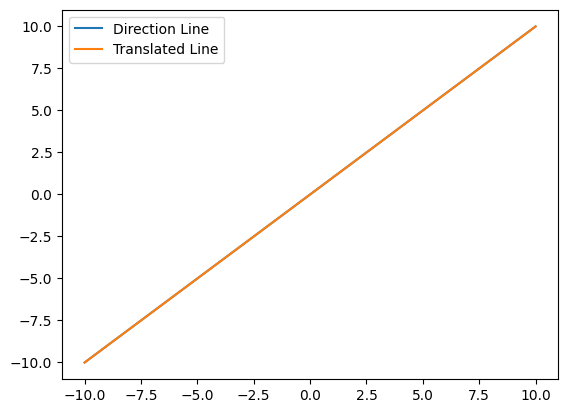


The solution spans the following vector(s):

Matrix([[-1], [-1]])
Matrix([[0], [0]])


In [64]:
def test_underdetermined_infinite_line():
    input_matrix = sp.Matrix([
        [1, 2, 3, 0],
        [0, 1, 1, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_underdetermined_infinite_line()


In [65]:
def test_dependent_equations():
    input_matrix = sp.Matrix([
        [1, 2, 3, 6],
        [2, 4, 6, 12],
        [3, 6, 9, 18]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_dependent_equations()


The solution set forms a plane.




The solution spans the following vector(s):

Matrix([[-2], [1], [0]])
Matrix([[-3], [0], [0]])
Matrix([[6], [0], [0]])


In [66]:
def test_3d_plane_solution():
    input_matrix = sp.Matrix([
        [1, 1, 1, 0],
        [0, 1, 1, 0],
        [0, 0, 1, 0]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_3d_plane_solution()


The solution set forms a single point.




The solution spans the following vector(s):

Matrix([[0], [0], [0]])


In [67]:
def test_unique_solution_point():
    input_matrix = sp.Matrix([
        [1, 0, 0, 2],
        [0, 1, 0, 3],
        [0, 0, 1, 4]
    ])
    rref_matrix, pivot_columns = input_matrix.rref()
    vectors = generate_vectors(rref_matrix, pivot_columns)
    plot_solution_set(vectors)

test_unique_solution_point()


The solution set forms a single point.




The solution spans the following vector(s):

Matrix([[2], [3], [4]])
